# Joint Genotyping Shard Validation

## Purpose: 

* Validate consistency in file size per base pair
* Validate headers for all files are the same

## Packages and Options

In [46]:
import glob, os, gzip
import matplotlib.pyplot as plt

## File Size per Base Pair

In [4]:
shards = sorted(glob.glob("/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/*.gz"))

shards

['/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr1-1-100000000.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr1-100000001-200000000.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr1-200000001-248956422.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr10-1-100000000.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr10-100000001-133797422.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr11-1-100000000.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr11-100000001-135086622.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr12-1-100000000.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr12-100000001-133275309.vcf.gz',
 '/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/

In [19]:
shard_sizes = {}

for file in shards:
    
    size = os.path.getsize(file)
    divisor = int(file.split("/")[-1].split(".")[0].split("-")[2]) - int(file.split("/")[-1].split(".")[0].split("-")[1])
    
    shard_sizes[file.split("/")[-1]] = size/divisor
    
shard_sizes

{'chr1-1-100000000.vcf.gz': 1816.8004797680048,
 'chr1-100000001-200000000.vcf.gz': 1618.7354589773545,
 'chr1-200000001-248956422.vcf.gz': 1796.617068045068,
 'chr10-1-100000000.vcf.gz': 1922.956402859564,
 'chr10-100000001-133797422.vcf.gz': 1891.6457240036154,
 'chr11-1-100000000.vcf.gz': 1868.830587858306,
 'chr11-100000001-135086622.vcf.gz': 1805.4364377806571,
 'chr12-1-100000000.vcf.gz': 1819.8895374188953,
 'chr12-100000001-133275309.vcf.gz': 1907.3156780697568,
 'chr13-1-100000000.vcf.gz': 1591.20100046201,
 'chr13-100000001-114364328.vcf.gz': 1999.6912133788098,
 'chr14-1-100000000.vcf.gz': 1491.5405538054056,
 'chr14-100000001-107043718.vcf.gz': 2366.8997171521796,
 'chr15-1-100000000.vcf.gz': 1506.4203587042036,
 'chr15-100000001-101991189.vcf.gz': 2211.8222377796574,
 'chr16-1-90338345.vcf.gz': 1950.953173018093,
 'chr17-1-83257441.vcf.gz': 1888.0289036391223,
 'chr18-1-80373285.vcf.gz': 1797.793287829324,
 'chr19-1-58617616.vcf.gz': 2135.9035778579528,
 'chr2-1-100000000.

Text(0.5, 1.0, 'Shards by File Size per Base Pair')

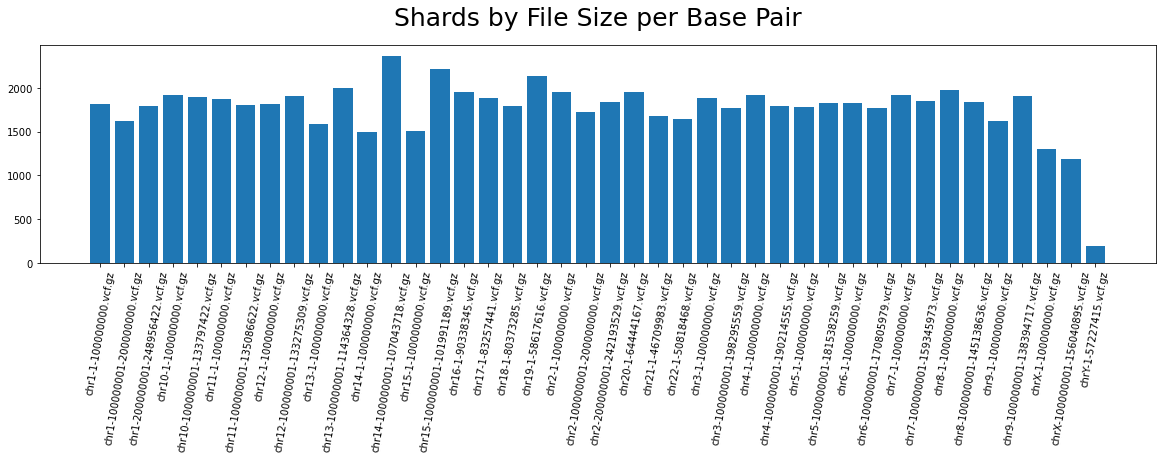

In [43]:
plt.figure(figsize=[20,4])
plt.bar(shard_sizes.keys(), shard_sizes.values())
_ = plt.xticks(rotation=80)

plt.title("Shards by File Size per Base Pair", fontsize=25, pad=20)


## Order of Sample Names 

In [56]:
for file in shards:
    
    print(file)
    
    header_string = ''
    first_time = True
    
    with gzip.open(file,'rt') as in_file: 
        
        for line in in_file:

            if line.startswith("#CHROM"): 
                if first_time: 
                    header_string = line.strip()
                else: 
                    assert line.strip() == header_string
            
                break
            

/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr1-1-100000000.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr1-100000001-200000000.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr1-200000001-248956422.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr10-1-100000000.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr10-100000001-133797422.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr11-1-100000000.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr11-100000001-135086622.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr12-1-100000000.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr12-100000001-133275309.vcf.gz
/pool/data/globus/genomics_base/Sentieon_JG_Fall_2021_and_2022/shards/chr13-1-100000000.vcf.gz
/pool/data/gl